# Predicting House Sale Prices Using KNN and Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
%matplotlib inline

pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv("AmesHousing.tsv",delimiter='\t')

In [3]:
map_dict = {
     'Lot Shape' : {
    'Reg' : 4,
    'IR1' : 3,
    'IR2' : 2,
    'IR3' : 1
    },
    'Utilities' : {
        'AllPub' : 3,
        'NoSewr' : 2,
        'NoSeWa' : 1
    },
    'Land Slope' : {
        'Gtl' : 3,
        'Mod' : 2,
        'Sev' : 1
    },
    'Exter Qual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Exter Cond' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Heating QC' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Electrical' : {
        'SBrkr' : 5,
        'FuseA' : 4,
        'FuseF' : 3,
        'FuseP' : 2,
        'Mix' : 1
    },
    'Kitchen Qual' :{
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Functional' : {
        'Typ' : 8,
        'Min1' : 7,
        'Min2' : 6,
        'Mod' : 5,
        'Maj1' : 4,
        'Maj2' : 3,
        'Sev' : 2,
        'Sal' : 1
    },
    'Paved Drive' : {
        'Y' : 3,
        'P' : 2,
        'N' : 1
    }
}

39042.37291815177

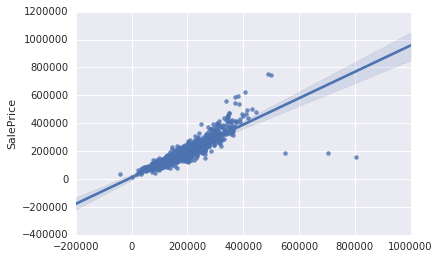

In [4]:

def transform_features(df):
    #finding missing values with less than %5 missing and greater than 25%.
    null_df = df.isnull().sum()
    null_df_less5 = null_df[(null_df/null_df.shape[0] > 0) & (null_df/null_df.shape[0] < .05)]
    null_df_greater25 = null_df[(null_df/null_df.shape[0]) > .25]
    
    #Fill any column with less than 5% missing with its most popular value
    for col in null_df_less5.index:
        val = df[col].value_counts().sort_values(ascending=False).index[0]
        df[col] = df[col].fillna(val)
  
    #Drop Any column with greater than 25% null
    for col in null_df_greater25.index:
        df = df.drop(col,axis=1)
        
    # Making list of columns that will be dropped due to them not being useful to the model or will cause data leakage
    drop_columns = ['Year Built', 'Year Remod/Add','Order','PID','Sale Type','Sale Condition','Yr Sold','Mo Sold']

    # Creating some features using some Data Leak columns which will later be dropped. 
    df['Yrs Since Remod/Add'] = df['Yr Sold'] - df['Year Remod/Add']
    df['House Age'] = df['Yr Sold'] - df['Year Built']
    
    #Dropping Data Leak and Useless columns
    df.drop(drop_columns,axis=1,inplace=True)
    
    #Transforming object data in categorical dummies
    ordinal_columns = ['Lot Shape','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
    #lets not make a list of columns we already removed
    ordinal_columns = [i for i in ordinal_columns if i not in null_df_greater25.index]
    #lets remove the columns that are already in 1-10 order, because these will not be mapped
    ordinal_columns = [ i for i in ordinal_columns if i not in ['Overall Qual', 'Overall Cond']]
    #Lets use our mapping above for transforming these ordinal columns
    for col in ordinal_columns:
        df[col] = df[col].map(map_dict[col])
    
    #Lets transform the rest of these using One Hot Encoding and get_dummies
    df = pd.get_dummies(df)
    
    return df

def select_features(df):
    corr_gre_4 = df.corrwith(df['SalePrice']).abs().sort_values(ascending=False) > 0.4
    features = corr_gre_4[corr_gre_4 > .4].index
    return df[features]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    sns.regplot(x=predictions,y=test['SalePrice'])
    
    return rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

In [5]:
'''
test_rfe_df = transform_features(df)
model = linear_model.LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(test_rfe_df, test_rfe_df['SalePrice'])
'''


"\ntest_rfe_df = transform_features(df)\nmodel = linear_model.LinearRegression()\nrfe = RFE(model, 5)\nfit = rfe.fit(test_rfe_df, test_rfe_df['SalePrice'])\n"

In [6]:
#lrtest_rfe_df.columns[fit.support_]

## Transforming Features and Cleaning Data - Work Cells for our function above

In [7]:
#Experimenting with columns and cleaning before making function
train = df[0:1460]
test = df[1460:]
print('Object Null')
print(df.select_dtypes(include=['object']).isnull().sum())
print('Numeric Null')
df.select_dtypes(include=['integer','float']).isnull().sum()

Object Null
MS Zoning            0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2917
Fence             2358
Misc Feature      2824
Sale Type            0
Sale Condition       0

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [8]:
#finding missing values with less than %5 missing and greater than 25%.
null_df = df.isnull().sum()
null_df_less5 = null_df[(null_df/null_df.shape[0] > 0) & (null_df/null_df.shape[0] < .05)]
null_df_greater25 = null_df[(null_df/null_df.shape[0]) > .25]

In [9]:
#Fill any column with less than 5% missing with its most popular value
for col in null_df_less5.index:
    val = df[col].value_counts().sort_values(ascending=False).index[0]
    df[col] = df[col].fillna(val)
    print('Filling in :', col, 'with', val)

In [10]:
#Drop Any column with greater than 25% null
print(df.shape)
for col in null_df_greater25.index:
    df = df.drop(col,axis=1)
    print('Dropping : ', col)
df.shape

(2930, 82)
Dropping :  Lot Frontage
Dropping :  Alley
Dropping :  Mas Vnr Type
Dropping :  Mas Vnr Area
Dropping :  Bsmt Qual
Dropping :  Bsmt Cond
Dropping :  Bsmt Exposure
Dropping :  BsmtFin Type 1
Dropping :  BsmtFin Type 2
Dropping :  Fireplace Qu
Dropping :  Garage Type
Dropping :  Garage Yr Blt
Dropping :  Garage Finish
Dropping :  Garage Qual
Dropping :  Garage Cond
Dropping :  Pool QC
Dropping :  Fence
Dropping :  Misc Feature


(2930, 64)

## Understanding the columns a bit more to decide how to clean the data

https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [11]:
# Making list of columns that will be dropped due to them not being useful to the model or will cause data leakage

drop_columns = ['Year Built', 'Year Remod/Add','Order','PID','Sale Type','Sale Condition','Yr Sold','Mo Sold']

In [12]:
# Creating some features using some Data Leak columns which will later be dropped. 
df['Yrs Since Remod/Add'] = df['Yr Sold'] - df['Year Remod/Add']
df['House Age'] = df['Yr Sold'] - df['Year Built']

In [13]:
#Dropping Data Leak and Useless columns
df.drop(drop_columns,axis=1,inplace=True)

### Understanding Our Categorical Values in the Dataset

In [14]:
ordinal_columns = ['Lot Shape','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
#lets not make a list of columns we already removed
ordinal_columns = [i for i in ordinal_columns if i not in null_df_greater25.index]
#lets remove the columns that are already in 1-10 order, because these will not be mapped
ordinal_columns = [ i for i in ordinal_columns if i not in ['Overall Qual', 'Overall Cond']]
#Lets create mapping for these columns using our documentation
map_dict = {
     'Lot Shape' : {
    'Reg' : 4,
    'IR1' : 3,
    'IR2' : 2,
    'IR3' : 1
    },
    'Utilities' : {
        'AllPub' : 3,
        'NoSewr' : 2,
        'NoSeWa' : 1
    },
    'Land Slope' : {
        'Gtl' : 3,
        'Mod' : 2,
        'Sev' : 1
    },
    'Exter Qual' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Exter Cond' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Heating QC' : {
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Electrical' : {
        'SBrkr' : 5,
        'FuseA' : 4,
        'FuseF' : 3,
        'FuseP' : 2,
        'Mix' : 1
    },
    'Kitchen Qual' :{
        'Ex' : 5,
        'Gd' : 4,
        'TA' : 3,
        'Fa' : 2,
        'Po' : 1
    },
    'Functional' : {
        'Typ' : 8,
        'Min1' : 7,
        'Min2' : 6,
        'Mod' : 5,
        'Maj1' : 4,
        'Maj2' : 3,
        'Sev' : 2,
        'Sal' : 1
    },
    'Paved Drive' : {
        'Y' : 3,
        'P' : 2,
        'N' : 1
    }
}



In [15]:
for col in ordinal_columns:
    df[col] = df[col].map(map_dict[col])

### Lets look at our remaining Object datatypes. Specifically our Nominal data

In [16]:
#Lets transform the rest of these using One Hot Encoding and get_dummies
df = pd.get_dummies(df)

## Feature Selection

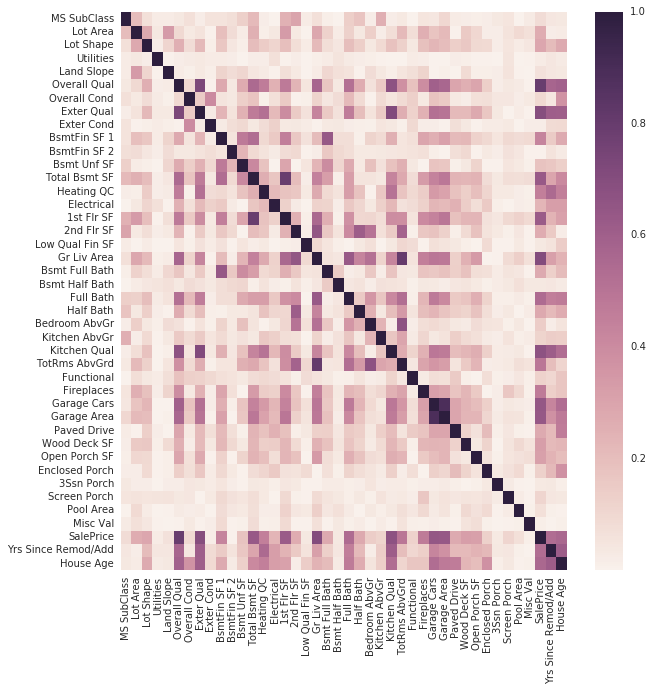

In [17]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(df.select_dtypes(include=['int','float']).corr().abs())

In [18]:
corr_gre_4 = df.corrwith(df['SalePrice']).abs().sort_values(ascending=False) > 0.4
corr_gre_4[corr_gre_4 > .4].index.drop('SalePrice')

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual',
       'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'House Age', 'Full Bath', 'Yrs Since Remod/Add', 'Foundation_PConc',
       'TotRms AbvGrd', 'Fireplaces', 'Heating QC', 'Neighborhood_NridgHt',
       'BsmtFin SF 1'],
      dtype='object')

In [19]:
df[df.columns[pd.Series(df.columns).str.startswith('G')]].corr()

,Gr Liv Area,Garage Cars,Garage Area
Gr Liv Area,1.000000,0.488854,0.483971
Garage Cars,0.488854,1.000000,0.888699
Garage Area,0.483971,0.888699,1.000000


## Validation / Training

In [20]:
data = pd.read_csv("AmesHousing.tsv",delimiter='\t')
data = transform_features(data)
data = select_features(data)
features = data.drop('SalePrice',axis=1).columns
kf = KFold(5,shuffle=True)
lr = linear_model.LinearRegression()
mses = cross_val_score(lr,data[features],data['SalePrice'], scoring="neg_mean_squared_error", cv=kf)
rmses = np.abs(mses)**(1/2)
rmses

array([ 36867.56955441,  32824.05353127,  36649.99440333,  27081.85883365,
        33782.21083643])

## Rewriting Our Functions from Above

In [21]:
def transform_features(df):
    #finding missing values with less than %5 missing and greater than 25%.
    null_df = df.isnull().sum()
    null_df_less5 = null_df[(null_df/null_df.shape[0] > 0) & (null_df/null_df.shape[0] < .05)]
    null_df_greater25 = null_df[(null_df/null_df.shape[0]) > .25]
    
    #Fill any column with less than 5% missing with its most popular value
    for col in null_df_less5.index:
        val = df[col].value_counts().sort_values(ascending=False).index[0]
        df[col] = df[col].fillna(val)
  
    #Drop Any column with greater than 25% null
    for col in null_df_greater25.index:
        df = df.drop(col,axis=1)
        
    # Making list of columns that will be dropped due to them not being useful to the model or will cause data leakage
    drop_columns = ['Year Built', 'Year Remod/Add','Order','PID','Sale Type','Sale Condition','Yr Sold','Mo Sold']

    # Creating some features using some Data Leak columns which will later be dropped. 
    df['Yrs Since Remod/Add'] = df['Yr Sold'] - df['Year Remod/Add']
    df['House Age'] = df['Yr Sold'] - df['Year Built']
    
    #Dropping Data Leak and Useless columns
    df.drop(drop_columns,axis=1,inplace=True)
    
    #Transforming object data in categorical dummies
    ordinal_columns = ['Lot Shape','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
    #lets not make a list of columns we already removed
    ordinal_columns = [i for i in ordinal_columns if i not in null_df_greater25.index]
    #lets remove the columns that are already in 1-10 order, because these will not be mapped
    ordinal_columns = [ i for i in ordinal_columns if i not in ['Overall Qual', 'Overall Cond']]
    #Lets use our mapping above for transforming these ordinal columns
    for col in ordinal_columns:
        df[col] = df[col].map(map_dict[col])
    
    #Lets transform the rest of these using One Hot Encoding and get_dummies
    df = pd.get_dummies(df)
    
    return df

def select_features(df):
    corr_gre_4 = df.corrwith(df['SalePrice']).abs().sort_values(ascending=False) > 0.4
    features = corr_gre_4[corr_gre_4 > .4].index
    return df[features]

def train_and_test(df,k=0):  
    lr = linear_model.LinearRegression()
    features = df.drop('SalePrice',axis=1).columns
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        sns.regplot(x=predictions,y=test['SalePrice'])

        return rmse
    
    elif k == 1:
        df = df.sample(frac=1).reset_index(drop=True)
        fold_one = df[0:1460]
        fold_two = df[1460:]
        
        fold_one_train = lr.fit(fold_one[features], fold_one['SalePrice'])
        fold_one_predict = lr.predict(fold_two[features])
        fold_one_rmse = np.sqrt(mean_squared_error(fold_two['SalePrice'],fold_one_predict))
        
        fold_two_train = lr.fit(fold_two[features], fold_two['SalePrice'])
        fold_two_predict = lr.predict(fold_one[features])
        fold_two_rmse = np.sqrt(mean_squared_error(fold_one['SalePrice'],fold_two_predict))
        
        return np.mean([fold_one_rmse,fold_two_rmse])
    
    elif k > 1:
        kf = KFold(k,shuffle=True)
        mses = cross_val_score(lr,data[features],data['SalePrice'], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.abs(mses)**(1/2)
        return rmses

In [22]:
data = pd.read_csv("AmesHousing.tsv",delimiter='\t')
data = transform_features(data)
data = select_features(data)

np.mean(train_and_test(data,10))

33256.403733942796

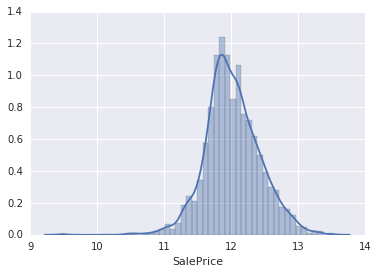

In [30]:
sns.distplot(np.log(data['SalePrice']))